# **CS 351L - AI Lab**

## **Student Name: Muhammad Younas**
### **BS Cybersecurity - 5th Semester**

---

## **Lab - 04 Agenda**

In this lab, we have explore various concepts in Artificial Intelligence (AI), focusing on practical implementations using Python. I have work on hands-on exercises and project (The Olivetti faces dataset) that will help you understand AI techniques, algorithms, and tools commonly used in the field of AI and cybersecurity.

### **Course Overview:**
- **Course Code:** CS 351L
- **Program:** BS Cybersecurity
- **Semester:** 5th

### **Note:**

 The Lab04 task is in folder (M_YOUNAS_CS351_AI_Lab04).


---

### **Let's get started!**

![Alt Text](https://cdn.dribbble.com/users/1523313/screenshots/16134521/media/3975730626bdae63cf9b25d3b634bac3.gif)


# **Part 1: Data Exploration and Preprocessing**

## **Step 1.1: Explore the Dataset**
  1. **Load the Dataset:** Read the Titanic dataset from a CSV file.
  2. **Display the First Few Rows:** Use head() to visualize the initial records.
  3. **Visualize Key Features:** Use Seaborn and Matplotlib to create visualizations for key features.
  4. **Check for Missing Values:** Use info() and isnull() to identify any missing data.

  ---

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9

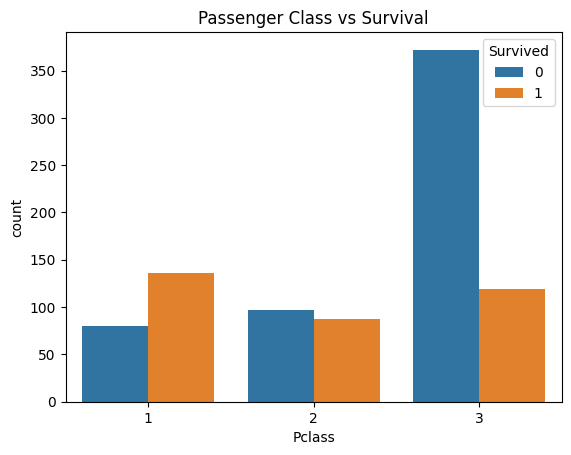

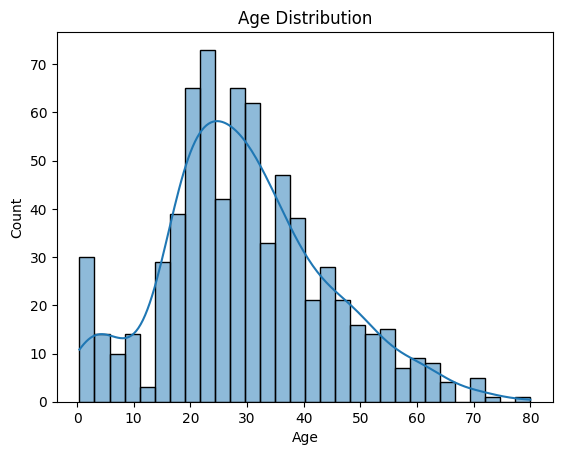

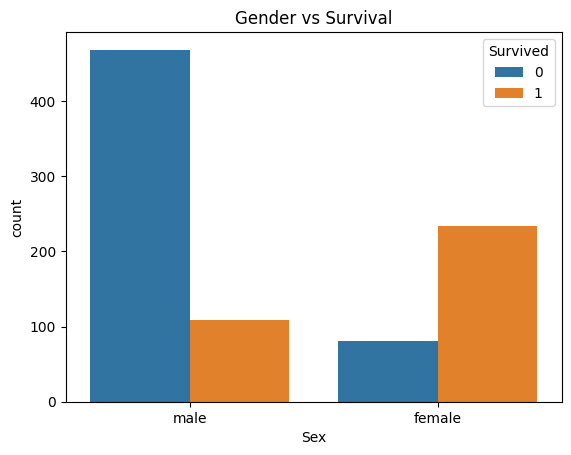

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the Titanic dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the data types and for any missing values
print(df.info())
print(df.isnull().sum())

# Visualize the distribution of key features
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Passenger Class vs Survival')
plt.show()

sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Gender vs Survival')
plt.show()


## **Step 1.2: Data Preprocessing**
  1. **Handle Missing Values:** Fill missing values in the 'Age' column with the median and in the 'Embarked' column with the mode.
  2. **Drop Unnecessary Columns:** Remove the 'Cabin' column due to excessive missing data.
  3. **Encode Categorical Variables:** Convert 'Sex' and 'Embarked' into numerical values.
  4. **Standardize Numerical Features:** Scale 'Age' and 'Fare' using StandardScaler.

  -----

In [34]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Encode 'Sex' and 'Embarked' into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Standardize 'Age' and 'Fare'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Drop non-relevant columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

print(df.head())  # Display the preprocessed data


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845       False   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


# **Part 2: Implementing k-NN and Decision Trees**
## **Step 2.1: Model Training**
  1. **Split the Dataset**: Divide the dataset into training (70%) and testing (30%) sets.
  2. **Train the k-NN Model:** Implement the k-NN algorithm.
  3. **Train the Decision Tree Model:** Implement the Decision Tree algorithm.

  ----

In [35]:
# Splitting the dataset into features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# k-NN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

## **Step 2.2: Model Evaluation**
  1. **Make Predictions:** Use the test set for both models.
  2. **Evaluate Performance:** Calculate accuracy, precision, recall, and F1-score.

  -----

In [36]:
# Making predictions on the test set
y_pred_knn = knn.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)

# Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# k-NN metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Decision Tree metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Display the results
print(f"k-NN Accuracy: {accuracy_knn:.2f}")
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")


k-NN Accuracy: 0.78
Decision Tree Accuracy: 0.81


# **Part 3: Visualization**
## **Step 3.1: Decision Boundaries**
  1. **Visualize Decision Boundaries:** Create plots to show how each model classifies data based on 'Age' and 'Fare'.

  ---

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


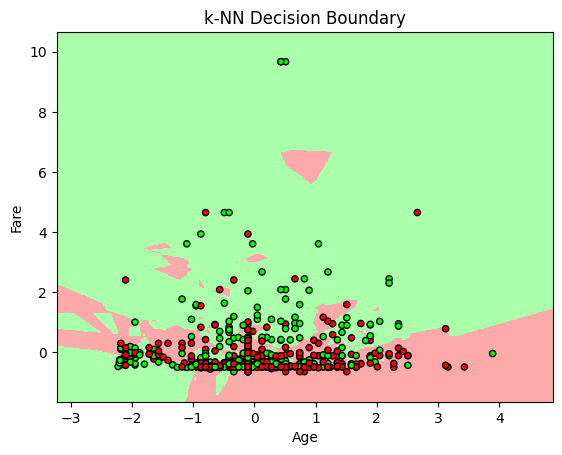

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


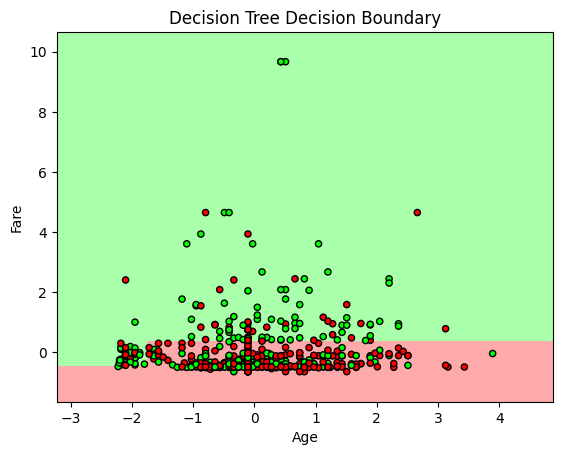

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Assuming df is already defined and is a pandas DataFrame containing the Titanic dataset
# Splitting the dataset into features and target variable
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Filter features for plotting
X_filtered = X[['Age', 'Fare']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

# k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict using the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

# Plotting decision boundaries using the filtered dataset
plot_decision_boundary(knn, X_train.values, y_train, title='k-NN Decision Boundary')
plot_decision_boundary(decision_tree, X_train.values, y_train, title='Decision Tree Decision Boundary')


# **Step 3.2: Performance Visualization**
  1. **Create Bar Charts:** Compare the performance metrics of both models visually.

  ----

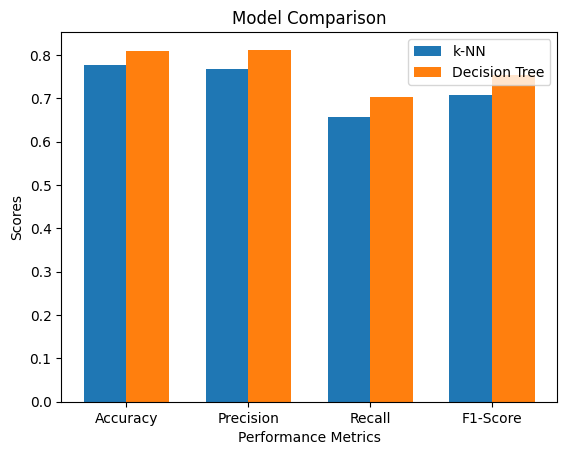

In [43]:
# Bar chart to compare model performance
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]
tree_scores = [accuracy_tree, precision_tree, recall_tree, f1_tree]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(performance_metrics))

bar1 = ax.bar(index, knn_scores, bar_width, label='k-NN')
bar2 = ax.bar(index + bar_width, tree_scores, bar_width, label='Decision Tree')

ax.set_xlabel('Performance Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(performance_metrics)
ax.legend()

plt.show()
